In [102]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [103]:
from cosmic.sample.initialbinarytable import InitialBinaryTable
from cosmic.sample.sampler import independent

In [104]:
InitialBinaries, mass_singles, mass_binaries, n_singles, n_binaries = InitialBinaryTable.sampler('independent', final_kstar1=[14], final_kstar2=[14], binfrac_model=0.7, primary_model='kroupa01', ecc_model='sana12', porb_model='sana12', qmin=-1, SF_start=13700.0, SF_duration=0.0, met=0.02, size=10000)

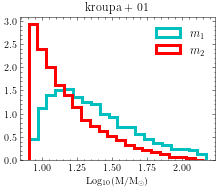

In [112]:
plt.hist(np.log10(InitialBinaries.mass_1), bins = 20, histtype='step', density=True,
         lw=3, color="c", label='$m_1$')
plt.hist(np.log10(InitialBinaries.mass_2), bins = 20, histtype='step', density=True,
         lw=3, color="r", label='$m_2$')
plt.xlabel(r'Log$_{10}$(M/M$_{\odot})$')
#plt.ylabel('normalized counts', size=15)
plt.legend()
plt.legend(prop={'size' : 12})
plt.title("kroupa + 01")
plt.savefig("Plots/kroupa01/ini-mass-dist.pdf")

In [5]:
InitialBinaries[InitialBinaries['mass_2']<1.0]

,kstar_1,kstar_2,mass_1,mass_2,porb,ecc,metallicity,tphysf,mass0_1,mass0_2,...,tacc_1,tacc_2,epoch_1,epoch_2,tms_1,tms_2,bhspin_1,bhspin_2,tphys,binfrac


In [6]:
n_singles

1471633

In [7]:
n_binaries

3438367

In [8]:
mass_singles

857137.4628390847

In [9]:
from cosmic.evolve import Evolve

In [10]:
BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.0, 'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'grflag' : 1, 'remnantflag': 4, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.014, 'bhms_coll_flag' : 0, 'don_lim' : -1, 'acc_lim' : -1}

In [11]:
bpp, bcm, initC, kick_info  = Evolve.evolve(initialbinarytable=InitialBinaries, BSEDict=BSEDict)

/home/pranav/miniconda3/envs/cosmic/lib/python3.7/site-packages/cosmic/utils.py:1445: UserWarning: At least one of your initial binaries is starting in Roche Lobe Overflow:
       kstar_1  kstar_2      mass_1     mass_2      porb       ecc  \
19         1.0      1.0  133.347824  75.989638  1.884492  0.349346   
104        1.0      1.0   89.269109  44.391435  1.648745  0.018234   
119        1.0      1.0   41.836924  26.087891  1.521386  0.136851   
125        1.0      1.0   48.075866  45.440410  1.678649  0.199645   
232        1.0      1.0  103.284547  78.958883  1.915039  0.774812   
...        ...      ...         ...        ...       ...       ...   
9797       1.0      1.0   57.621506  32.648701  1.433461  0.082787   
9831       1.0      1.0  101.531889  62.428473  1.863497  0.448768   
9860       1.0      1.0  103.197078  11.724838  1.471015  0.358844   
9909       1.0      1.0   63.635059  23.310056  1.421735  0.004812   
10001      1.0      1.0  102.345102  68.760547  1.919842 

In [12]:
bh_index_1 = np.array(bcm[bcm.kstar_1==14.0].index)
bh_final_m1 = np.array(bcm[bcm.kstar_1==14.0].mass_1)

#bh_index_2 = np.array(bcm[bcm.kstar_2==14.0].index)
#bh_final_m2 = np.array(bcm[bcm.kstar_2==14.0].mass_2)

In [13]:
bh_ini_m1 = []
bh_ini_m2 = []

for indx in bh_index_1:
    bh_ini_m1.append(np.array(bcm[bcm.index==indx].mass_1)[0])
    
#for indx in bh_index_2:
    #bh_ini_m2.append(np.array(bcm[bcm.index==indx].mass_2)[0])

In [23]:
plt.style.use('science')

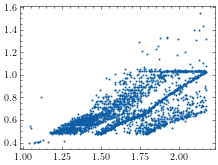

In [24]:
plt.scatter(np.log10(bh_ini_m1),np.log10(bh_final_m1),s=0.9,label="m1")
#plt.ylim(0,20)
#plt.scatter(bh_ini_m2,bh_final_m2,s=0.9,label="m1")

In [25]:
x = np.log10(bh_ini_m1)
y = np.log10(bh_final_m1)

In [26]:
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10

xmin = min(x) - deltaX
xmax = max(x) + deltaX

ymin = min(y) - deltaY
ymax = max(y) + deltaY

In [27]:
print(xmin, xmax, ymin, ymax)

0.9222225983521463 2.289511685690836 0.28470625292045254 1.662686516379946


In [28]:
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

In [29]:
import scipy.stats as st

In [30]:
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

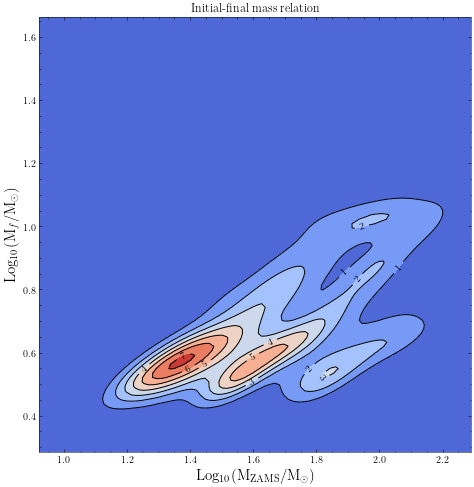

In [117]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel(r'Log$_{10}$(M$_{\text{ZAMS}}$/M$_{\odot}$)', size=15)
ax.set_ylabel(r'Log$_{10}$(M$_{f}$/M$_{\odot}$)', size=15)
plt.title('Initial-final mass relation')
#plt.savefig("BH-BH_ini-final_mass_contour.pdf")
plt.savefig("Plots/kroupa01/Mi-Mf-contour.pdf")
#ax.scatter(np.log10(bh_ini_m1),np.log10(bh_final_m1),s=0.3,color="1",label="m1")

(0.65, 0.78)

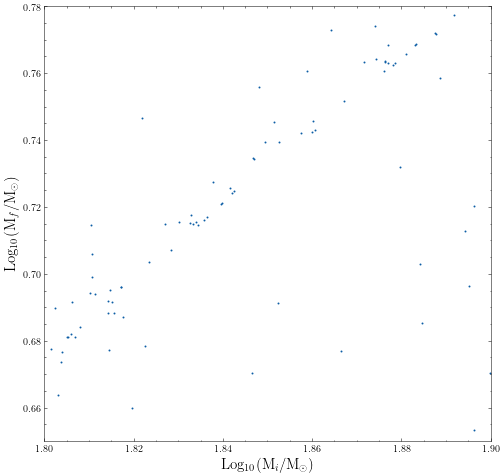

In [68]:
fig = plt.figure(figsize=(8,8))
plt.scatter(np.log10(bh_ini_m1),np.log10(bh_final_m1),s=0.9,label="m1")
plt.xlabel(r'Log$_{10}$(M$_{i}$/M$_{\odot}$)', size=15)
plt.ylabel(r'Log$_{10}$(M$_{f}$/M$_{\odot}$)', size=15)
plt.xlim(1.8,1.90)
plt.ylim(0.65,0.78)
#plt.legend()

In [45]:
m_bh = pd.DataFrame({'m1_ini': bh_ini_m1, 'm1_final': bh_final_m1,'m2_ini': bh_ini_m1, 'm2_final': bh_final_m1})

In [56]:
mia = 1.5; mib = 1.8; mic = 2.2;
mfa = 0.45; mfb = 0.65; mfc = 1.0;

M1_bh_sort1  = m_bh[np.log10(m_bh["m1_ini"])>mia]
M1_bh_sort2 = M1_bh_sort1[np.log10(M1_bh_sort1["m1_ini"])<mib]
M1_bh_sort3 = M1_bh_sort2[np.log10(M1_bh_sort2["m1_final"])>mfa]
M1_bh_sort4 = M1_bh_sort3[np.log10(M1_bh_sort3["m1_final"])<mfb]

Mb_bh_sort1  = m_bh[np.log10(m_bh["m1_ini"])>mib]
Mb_bh_sort2 = Mb_bh_sort1[np.log10(Mb_bh_sort1["m1_ini"])<mic]
Mb_bh_sort3 = Mb_bh_sort2[np.log10(Mb_bh_sort2["m1_final"])>mfb]
Mb_bh_sort4 = Mb_bh_sort3[np.log10(Mb_bh_sort3["m1_final"])<mfc]

In [57]:
def get_alpha(mi1,mi2,mf1,mf2):
    m1_bh_sort1  = m_bh[np.log10(m_bh["m1_ini"])>mi1]
    m1_bh_sort2 = m1_bh_sort1[np.log10(m1_bh_sort1["m1_ini"])<mi2]
    m1_bh_sort3 = m1_bh_sort2[np.log10(m1_bh_sort2["m1_final"])>mf1]
    m1_bh_sort4 = m1_bh_sort3[np.log10(m1_bh_sort3["m1_final"])<mf2]
    
    m,b = np.polyfit(np.log10(m1_bh_sort4["m1_ini"]),np.log10(m1_bh_sort4["m1_final"]),1)
    print(m,b)
    
    return m,b

In [58]:
alpha1,b1 = get_alpha(1.50,1.55,0.476,0.520)

0.5914994962761383 -0.4004932025693453


In [71]:
alpha2,b2 = get_alpha(1.80,1.85,0.67,0.75)

1.0032567336659313 -1.1257257576646598


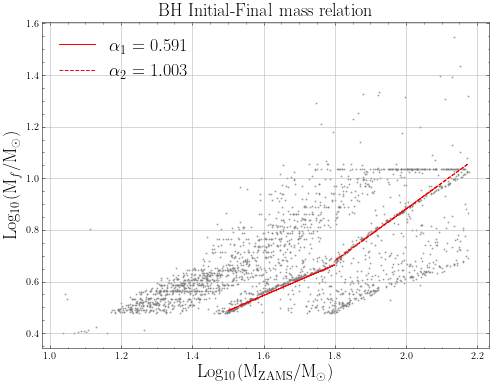

In [122]:
plt.figure(figsize=[8,6])
plt.scatter(np.log10(bh_ini_m1),np.log10(bh_final_m1),s=0.9,color="gray",alpha=0.6)
plt.plot(np.log10(M1_bh_sort4["m1_ini"]),alpha1*np.log10(M1_bh_sort4["m1_ini"])+b1,"r",label=r"$\alpha_{1} = %3.3f$"%(alpha1))
plt.plot(np.log10(Mb_bh_sort4["m1_ini"]),alpha2*np.log10(Mb_bh_sort4["m1_ini"])+b2,"r--",label=r"$\alpha_{2} = %3.3f$"%(alpha2))
plt.grid()
plt.xlabel(r'Log$_{10}$(M$_{\text{ZAMS}}$/M$_{\odot}$)', size=18)
plt.ylabel(r'Log$_{10}$(M$_{f}$/M$_{\odot}$)', size=18)
plt.title("BH Initial-Final mass relation",size=18)
plt.legend(prop={'size' : 18})
plt.savefig("Plots/kroupa01/Mi-Mf-loglog.pdf")